In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [222]:
#Data Loading into a dataset
df=pd.read_csv('listings.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [140]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print(' \nUnique:\n',df.nunique())


Rows :  7608

Columns : 18

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                7608
name                              3585
host_id                           6571
host_name                         3031
neighbourhood_group                  0
neighbourhood                       22
latitude                          5196
longitude                         6137
room_type                            4
price                              626
minimum_nights                      48
number_of_reviews                  478
last_review                        977
reviews_per_month                  637
calculated_host_listings_count      17
availability_365                   366
number_of_reviews_ltm              1

In [176]:
df = df.drop_duplicates()
df = df.dropna()  

In [177]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
5,162467,Rental unit in Amsterdam · ★4.77 · 1 bedroom ·...,776296,Nicole,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170,3,67,2023-05-26,0.53,1,157,5,0363 C6C3 A2DC 89AC B72B
6,214531,Rental unit in Amsterdam · ★4.82 · 1 bedroom ·...,1107389,Henry,Centrum-West,52.37169,4.89446,Private room,115,3,175,2022-06-26,1.24,1,0,2,0363 1939 7BED DDCD 0353
8,219276,Guest suite in Amsterdam · ★4.88 · 1 bedroom ·...,1135329,Amsterdam Boutique Apartments,Centrum-West,52.36883,4.88749,Private room,300,2,17,2022-10-23,0.13,1,126,4,0363 1179 146A FBDB 79FC


In [178]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print(' \nUnique:\n',df.nunique())


Rows :  5799

Columns : 17

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                5799
name                              2657
host_id                           5182
host_name                         2544
neighbourhood                       22
latitude                          4150
longitude                         4822
room_type                            4
price                              565
minimum_nights                      38
number_of_reviews                  350
last_review                        929
reviews_per_month                  512
calculated_host_listings_count      17
availability_365                   363
number_of_reviews_ltm              136
license                           5150
dtype: int64


In [224]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,7.608000e+03,7608,7.608000e+03,7608,0.0,7608,7608.000000,7608.000000,7608,7608.000000,7608.000000,7608.000000,6898,6898.000000,7608.000000,7608.000000,7608.000000,6474
unique,NaN,3585,NaN,3031,NaN,22,NaN,NaN,4,NaN,NaN,NaN,977,NaN,NaN,NaN,NaN,5737
top,NaN,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,NaN,Maarten,NaN,De Baarsjes - Oud-West,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-05-21,NaN,NaN,NaN,NaN,Exempt
freq,NaN,224,NaN,39,NaN,1260,NaN,NaN,5783,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN,571
mean,2.328487e+17,NaN,1.032177e+08,NaN,NaN,NaN,52.366725,4.889936,NaN,251.065589,4.914564,47.499211,NaN,1.170351,1.798896,79.586619,11.798896,NaN
std,3.489604e+17,NaN,1.393419e+08,NaN,NaN,NaN,0.017068,0.035059,NaN,263.170218,33.263777,106.402516,NaN,2.353310,2.590756,106.483001,33.469905,NaN
min,2.818000e+03,NaN,3.159000e+03,NaN,NaN,NaN,52.290340,4.755710,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.696009e+07,NaN,9.937172e+06,NaN,NaN,NaN,52.355890,4.866060,NaN,148.000000,2.000000,3.000000,NaN,0.270000,1.000000,0.000000,0.000000,NaN
50%,3.822749e+07,NaN,3.501297e+07,NaN,NaN,NaN,52.365980,4.887770,NaN,202.000000,3.000000,11.000000,NaN,0.560000,1.000000,21.000000,3.000000,NaN
75%,6.525168e+17,NaN,1.402245e+08,NaN,NaN,NaN,52.376470,4.908300,NaN,300.000000,4.000000,40.000000,NaN,1.260000,1.000000,145.000000,9.000000,NaN


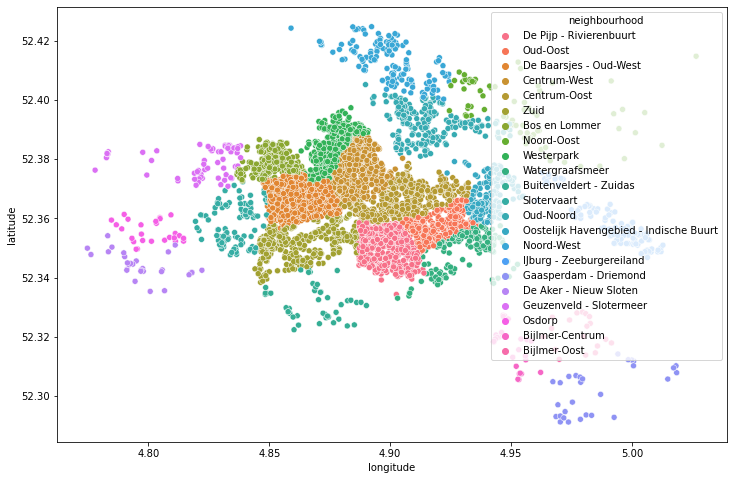

In [179]:
Long=5.002769
Lat=52.353220
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1
df.fillna({'reviews_per_month':0},inplace=True)
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood)
plt.show()

In [191]:
print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood.unique())

Unique value for room_type are : ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
Unique value for neighbourhood_group are : ['De Pijp - Rivierenbuurt' 'Oud-Oost' 'De Baarsjes - Oud-West'
 'Centrum-West' 'Centrum-Oost' 'Zuid' 'Bos en Lommer' 'Noord-Oost'
 'Westerpark' 'Watergraafsmeer' 'Buitenveldert - Zuidas' 'Slotervaart'
 'Oud-Noord' 'Oostelijk Havengebied - Indische Buurt' 'Noord-West'
 'IJburg - Zeeburgereiland' 'Gaasperdam - Driemond'
 'De Aker - Nieuw Sloten' 'Geuzenveld - Slotermeer' 'Osdorp'
 'Bijlmer-Centrum' 'Bijlmer-Oost']


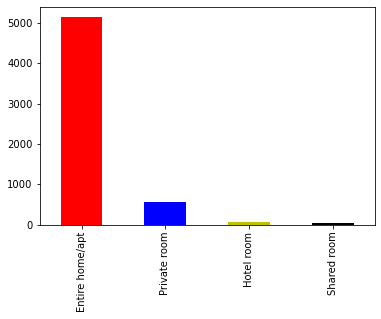

In [192]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y','black'])
plt.show()

In [193]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','room_type']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,room_type,apartment
4565,364305280,Arnold,De Pijp - Rivierenbuurt,Entire home/apt,14
4364,241644101,Wittenberg,Centrum-Oost,Entire home/apt,11
792,5796250,Remco,Centrum-West,Entire home/apt,10
4581,375961673,Cityden,Bos en Lommer,Entire home/apt,9
1244,9282300,Dutch Masters,Centrum-Oost,Entire home/apt,9
4856,497874880,James,Centrum-West,Entire home/apt,8
4005,135487531,Rogier & Nicole,Noord-West,Entire home/apt,7
3012,46691672,Eva & Kobe,Oud-Noord,Entire home/apt,6
4849,495838645,Mario,Centrum-West,Entire home/apt,6
4603,395728982,Arnoud,Geuzenveld - Slotermeer,Entire home/apt,5


In [194]:
sonder_data = df[df['host_name']=='Hendrik']
sonder_data_by = df[['host_id','host_name','neighbourhood','latitude','longitude']]
sonder_data_by.head(5)

,host_id,host_name,neighbourhood,latitude,longitude
2,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656
3,748161,Maria,Oud-Oost,52.36420,4.92829
5,776296,Nicole,De Baarsjes - Oud-West,52.36270,4.85693
6,1107389,Henry,Centrum-West,52.37169,4.89446
8,1135329,Amsterdam Boutique Apartments,Centrum-West,52.36883,4.88749


In [195]:
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood','room_type']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,room_type,private
111,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,Private room,21
356,488984558,Abdullah,Centrum-West,Private room,14
270,243878598,Bunk,Oud-Noord,Private room,10
288,311321908,Melrose Hotel,Centrum-West,Private room,9
266,237371423,Conscious Hotel Westerpark,Westerpark,Private room,9
334,398261845,Singel,Centrum-West,Private room,8
268,243118788,The Arcade Hotel,De Pijp - Rivierenbuurt,Private room,7
313,367808546,Galanti,Centrum-Oost,Private room,7
346,428344496,Catalonia Vondel Amsterdam,De Baarsjes - Oud-West,Private room,7
335,401163260,Q-Factory,Oud-Oost,Private room,7


In [196]:
private_data = df[df['host_name']=='Abdullah']
private_data_by = private_data[['host_id','host_name','neighbourhood','latitude','longitude']]
private_data_by.head()

,host_id,host_name,neighbourhood,latitude,longitude
6648,488984558,Abdullah,Centrum-West,52.374259,4.899258
6649,488984558,Abdullah,Centrum-West,52.374259,4.899258
6651,488984558,Abdullah,Centrum-West,52.374259,4.899258
6652,488984558,Abdullah,Centrum-West,52.374259,4.899258
6655,488984558,Abdullah,Centrum-West,52.373770,4.900240


In [197]:
private = df[df['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,shared
11,245267147,ClinkNOORD,Oud-Noord,8
7,198405490,Suzanne,Centrum-West,4
9,237150996,St Christophers At The Winston,Centrum-West,4
15,372015241,Ecomama,Centrum-Oost,3
14,308694260,Dutchies Hostel,Bos en Lommer,3
12,251479377,Generator,Oud-Oost,3
10,243878598,Bunk,Oud-Noord,2
19,483286831,Marrit,Centrum-Oost,2
8,198405490,Suzanne,De Baarsjes - Oud-West,1
6,101856083,Unsal,Centrum-Oost,1


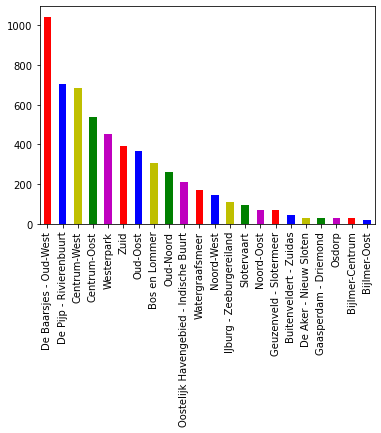

In [198]:
df['neighbourhood'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

In [199]:
private = df[df['neighbourhood']=='De Baarsjes - Oud-West']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,count
338,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,21
887,273266448,Vlad,De Baarsjes - Oud-West,9
941,428344496,Catalonia Vondel Amsterdam,De Baarsjes - Oud-West,8
870,244695471,Heye 130,De Baarsjes - Oud-West,6
796,128826790,Natasja & Mylan,De Baarsjes - Oud-West,3
851,203731852,Sweets,De Baarsjes - Oud-West,3
913,363404652,Conscious Hotel The Tire Station,De Baarsjes - Oud-West,3
12,613779,Silvana,De Baarsjes - Oud-West,3
826,154994295,Suzanne,De Baarsjes - Oud-West,2
91,3548522,Susanne,De Baarsjes - Oud-West,2


In [200]:
df.price.isna().sum()

0

In [201]:
df['price'].describe()

count     5799.000000
mean       259.654768
std        230.113564
min         18.000000
25%        156.000000
50%        220.000000
75%        302.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

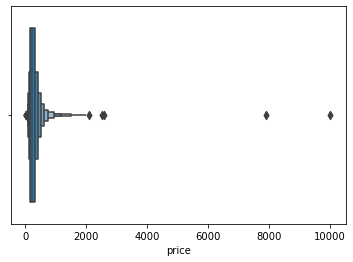

In [202]:
figsize=(12,8)
sns.boxenplot(x='price',data=df)

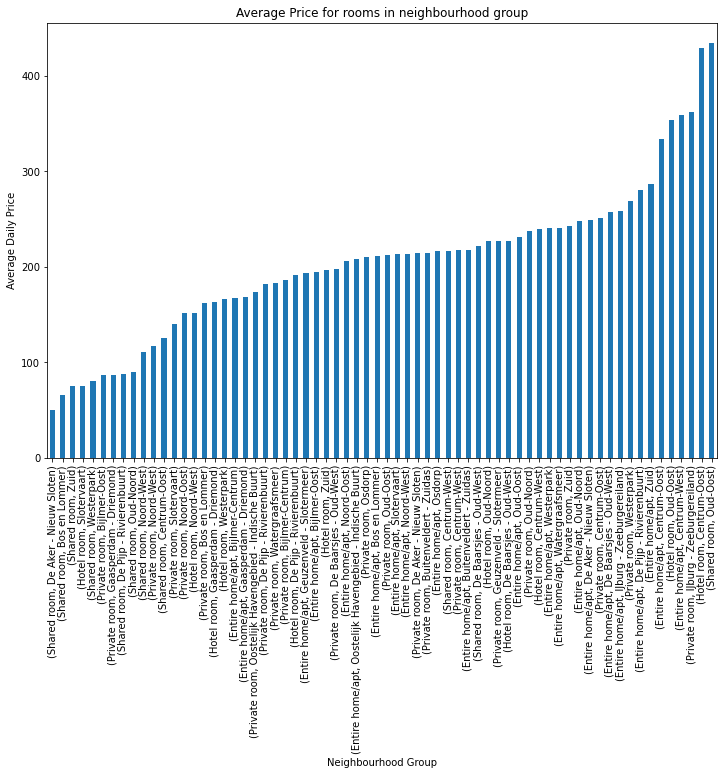

List of Average Price per night based on the neighbourhood 


price
room_type       neighbourhood                                     
Entire home/apt Bos en Lommer                           210.620000
                De Aker - Nieuw Sloten                  248.700000
                Noord-Oost                              206.145161
                Oostelijk Havengebied - Indische Buurt  208.070352
                Gaasperdam - Driemond                   168.380952
...                                                            ...
Shared room     Westerpark                               80.000000
                Zuid                                     75.000000
                Bos en Lommer                            65.666667
                De Baarsjes - Oud-West                  221.500000
                Oud-Oost                                433.666667

[66 rows x 1 columns]

In [203]:
df.head()
plt.figure(figsize=(12,8))
df0= df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood ')
pd.DataFrame(df1).sort_values(by='room_type')

Top 20 most expensive locality in Airbnb listing are :


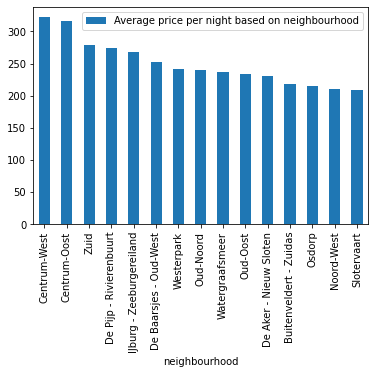

,Average price per night based on neighbourhood
neighbourhood,
Centrum-West,322.131579
Centrum-Oost,316.235622
Zuid,279.558974
De Pijp - Rivierenbuurt,274.601707
IJburg - Zeeburgereiland,267.901786
De Baarsjes - Oud-West,252.708812
Westerpark,241.356984
Oud-Noord,240.088462
Watergraafsmeer,236.796512


In [204]:
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

Least expensive neighbourhood according to Airbnb listing are


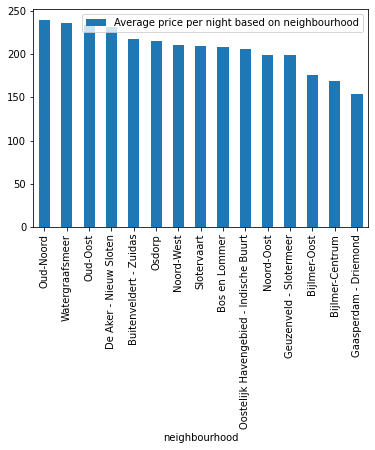

,Average price per night based on neighbourhood
neighbourhood,
Oud-Noord,240.088462
Watergraafsmeer,236.796512
Oud-Oost,234.337875
De Aker - Nieuw Sloten,231.064516
Buitenveldert - Zuidas,217.659091
Osdorp,215.037037
Noord-West,210.517241
Slotervaart,209.145833
Bos en Lommer,208.573290


In [205]:
print('Least expensive neighbourhood according to Airbnb listing are')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price", ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)
df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

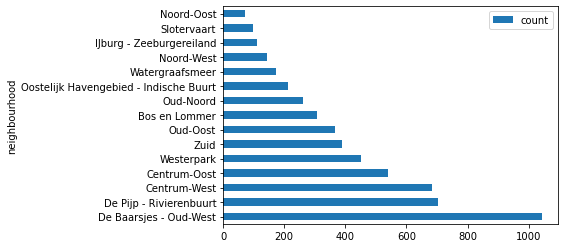

,count
neighbourhood,
De Baarsjes - Oud-West,1044
De Pijp - Rivierenbuurt,703
Centrum-West,684
Centrum-Oost,539
Westerpark,451
Zuid,390
Oud-Oost,367
Bos en Lommer,307
Oud-Noord,260


In [206]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


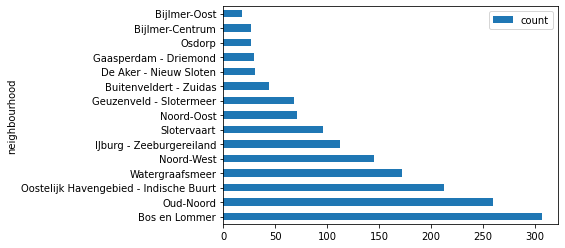

,count
neighbourhood,
Bos en Lommer,307
Oud-Noord,260
Oostelijk Havengebied - Indische Buurt,213
Watergraafsmeer,172
Noord-West,145
IJburg - Zeeburgereiland,112
Slotervaart,96
Noord-Oost,71
Geuzenveld - Slotermeer,68


In [207]:
print('Least Listing number of count')
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

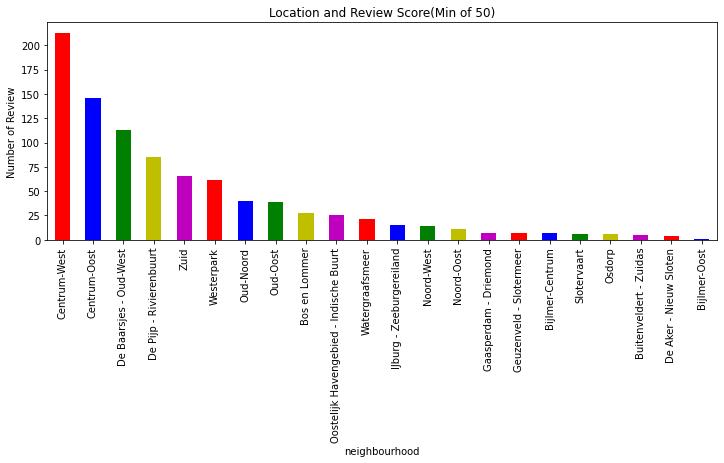

 Count of Review v/s neighbourhood


,neighbourhood
Centrum-West,213
Centrum-Oost,146
De Baarsjes - Oud-West,113
De Pijp - Rivierenbuurt,85
Zuid,66
Westerpark,62
Oud-Noord,40
Oud-Oost,39
Bos en Lommer,28
Oostelijk Havengebied - Indische Buurt,25


In [208]:
fig = plt.figure(figsize=(12,4))
review_50 = df[df['number_of_reviews']>=50]
df2 = review_50['neighbourhood'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('neighbourhood')
plt.show()
print(' Count of Review v/s neighbourhood')
pd.DataFrame(df2)

In [213]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
5,162467,Rental unit in Amsterdam · ★4.77 · 1 bedroom ·...,776296,Nicole,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170,3,67,2023-05-26,0.53,1,157,5,0363 C6C3 A2DC 89AC B72B
6,214531,Rental unit in Amsterdam · ★4.82 · 1 bedroom ·...,1107389,Henry,Centrum-West,52.37169,4.89446,Private room,115,3,175,2022-06-26,1.24,1,0,2,0363 1939 7BED DDCD 0353
8,219276,Guest suite in Amsterdam · ★4.88 · 1 bedroom ·...,1135329,Amsterdam Boutique Apartments,Centrum-West,52.36883,4.88749,Private room,300,2,17,2022-10-23,0.13,1,126,4,0363 1179 146A FBDB 79FC


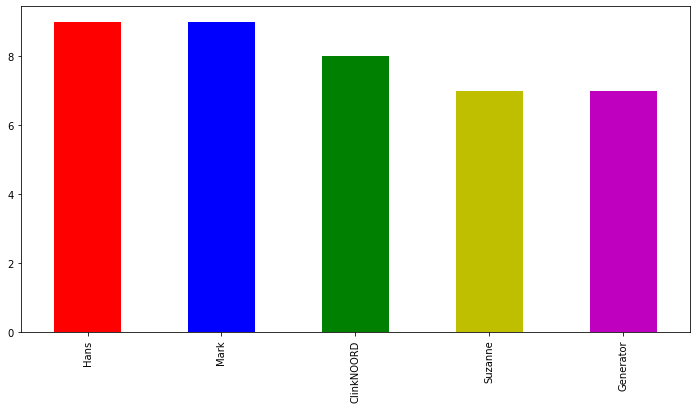

In [217]:
plt.figure(figsize=(12,6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
#sns.barplot(x=df1.index,y=df1.values)

<AxesSubplot:xlabel='availability_365', ylabel='price'>

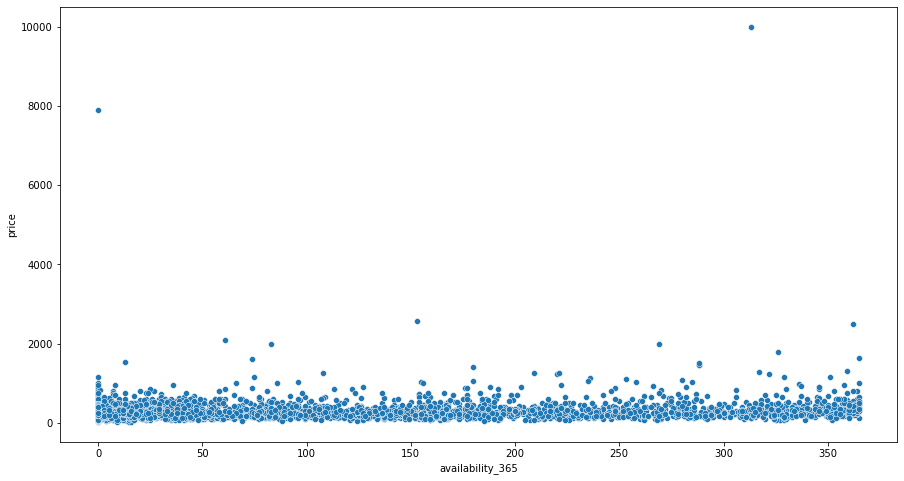

In [218]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

In [220]:
df6 = review_50.groupby(['neighbourhood','room_type']).mean()
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood')

host_id  \
neighbourhood                          room_type                       
Bijlmer-Centrum                        Entire home/apt  4.505241e+07   
                                       Private room     3.239466e+08   
Bijlmer-Oost                           Private room     6.476189e+07   
Bos en Lommer                          Entire home/apt  8.178185e+07   
                                       Private room     3.284838e+07   
Buitenveldert - Zuidas                 Entire home/apt  5.420032e+07   
                                       Private room     9.472424e+07   
Centrum-Oost                           Entire home/apt  6.862204e+07   
                                       Private room     1.259858e+08   
                                       Shared room      1.769200e+08   
Centrum-West                           Private room     1.391392e+08   
                                       Shared room      2.242358e+08   
                                       Entire home/apt  5.047225e+07   
                                       Hotel room       7.514695e+07   
De Aker - Nieuw Sloten                 Private room     7.156447e+07   
De Baarsjes - Oud-West                 Entire home/apt  3.516513e+07   
                                       Hotel room       2.566413e+08   
                                       Private room     1.314125e+08   
De Pijp - Rivierenbuurt                Entire home/apt  3.062918e+07   
                                       Hotel room       4.456680e+06   
                                       Private room     7.361396e+07   
Gaasperdam - Driemond                  Hotel room       5.137582e+06   
                                       Private room     1.209402e+07   
Geuzenveld - Slotermeer                Entire home/apt  4.391016e+07   
                                       Private room     2.011198e+08   
IJburg - Zeeburgereiland               Private room     7.510680e+07   
                                       Entire home/apt  9.423593e+07   
Noord-Oost                             Private room     4.519497e+07   
                                       Entire home/apt  2.366035e+07   
Noord-West                             Entire home/apt  1.253123e+08   
                                       Hotel room       4.615590e+06   
                                       Private room     1.923851e+07   
                                       Shared room      2.557863e+07   
Oostelijk Havengebied - Indische Buurt Entire home/apt  4.424137e+07   
                                       Private room     1.130308e+08   
Osdorp                                 Entire home/apt  1.013111e+07   
                                       Private room     4.070178e+08   
Oud-Noord                              Entire home/apt  3.788340e+07   
                                       Hotel room       2.452671e+08   
                                       Private room     1.247201e+08   
                                       Shared room      2.449200e+08   
Oud-Oost                               Shared room      2.514794e+08   
                                       Private room     1.781485e+08   
                                       Hotel room       3.354833e+08   
                                       Entire home/apt  4.101555e+07   
Slotervaart                            Entire home/apt  2.975013e+07   
                                       Private room     7.807100e+07   
Watergraafsmeer                        Entire home/apt  3.015889e+07   
                                       Private room     1.681608e+08   
Westerpark                             Entire home/apt  3.786162e+07   
                                       Hotel room       2.037319e+08   
                                       Private room     1.288545e+08   
Zuid                                   Entire home/apt  2.785380e+07   
                                       Hotel room       8.419840e+07   
                             